In [48]:
import pandas as pd
import numpy as np
#Importing the file with all the addresses.
data = pd.read_csv (r'C:\Users\Sander\Desktop\Real_estate\cleaned_data.csv')
df = pd.DataFrame(data, columns= ['links_Appartment_Rent_monthly', 'links_Appartment_Rooms'])
print('BEFORE removing stuff')
print(df) # printing and showing columns of price monthly and number of rooms

df['links_Appartment_Rent_monthly'] = df['links_Appartment_Rent_monthly'].str[:-2]
df['links_Appartment_Rent_monthly'] =df['links_Appartment_Rent_monthly'].str.replace(r'.', '') # removed "."

#Changing the type into integer
df = df[~df['links_Appartment_Rent_monthly'].isnull()] # links_Appartment_Rent_monthly contained NaN
df['links_Appartment_Rent_monthly'] =df['links_Appartment_Rent_monthly'].astype(int)

# changing to data to integer or string.
df = df.fillna(0)
df['links_Appartment_Rooms'] =df['links_Appartment_Rooms'].astype(int) #
print('AFTER removing stuff')
print(df)

BEFORE removing stuff
     links_Appartment_Rent_monthly  links_Appartment_Rooms
0                         16.700,-                     4.0
1                         15.900,-                     5.0
2                          6.044,-                     1.0
3                          6.359,-                     1.0
4                         24.950,-                     4.0
...                            ...                     ...
2956                      14.350,-                     3.0
2957                      11.995,-                     3.0
2958                      14.900,-                    43.0
2959                       5.000,-                     1.0
2960                       6.050,-                     1.0

[2961 rows x 2 columns]
AFTER removing stuff
      links_Appartment_Rent_monthly  links_Appartment_Rooms
0                             16700                       4
1                             15900                       5
2                              6044         

In [55]:
# calculate
# using apply function to create a new column 
df['Price_per_room'] = df['links_Appartment_Rent_monthly'] / df['links_Appartment_Rooms']
# Print the DataFrame after addition of new column 
df = df.fillna(0)
df['Price_per_room'] =df['Price_per_room'].astype(int)
print(df)
print(df.mean())

      links_Appartment_Rent_monthly  links_Appartment_Rooms  Price_per_room
0                             16700                       4            4175
1                             15900                       5            3180
2                              6044                       1            6044
3                              6359                       1            6359
4                             24950                       4            6237
...                             ...                     ...             ...
2956                          14350                       3            4783
2957                          11995                       3            3998
2958                          14900                      43             346
2959                           5000                       1            5000
2960                           6050                       1            6050

[2901 rows x 3 columns]
links_Appartment_Rent_monthly    14047.887280
links_Appartment_

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD4E8F2F40>]],
      dtype=object)

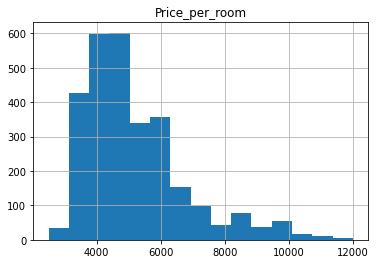

In [77]:
# histogram
%matplotlib inline 
#to plot charts into Jupyter Notebook
df.hist('Price_per_room', bins=15, range=[2500, 12000])

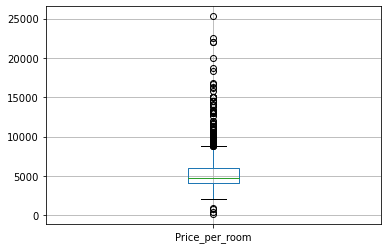

In [70]:
df.boxplot('Price_per_room')

In [80]:
#creating a new column with score rating/points
def rating_price(df):
    if (df['Price_per_room'] < 3000):
        return 5
    elif (df['Price_per_room'] < 3800):
        return 4
    elif (df['Price_per_room'] < 4600):
        return 3
    elif (df['Price_per_room'] < 5400):
        return 2
    elif (df['Price_per_room'] < 6200):
        return 1
    elif (df['Price_per_room'] < 7000):
        return 0
    elif (df['Price_per_room'] > 7000):
        return np.nan
    
df['Price_score'] = df.apply(rating_price, axis = 1)
df = df.fillna(0)
df['Price_score'] = df['Price_score'].astype(int)
print(df)

      links_Appartment_Rent_monthly  links_Appartment_Rooms  Price_per_room  \
0                             16700                       4            4175   
1                             15900                       5            3180   
2                              6044                       1            6044   
3                              6359                       1            6359   
4                             24950                       4            6237   
...                             ...                     ...             ...   
2956                          14350                       3            4783   
2957                          11995                       3            3998   
2958                          14900                      43             346   
2959                           5000                       1            5000   
2960                           6050                       1            6050   

      Price_score  
0               3  
1          